# Topic modeling / Тематическое моделирование
- is an approach to text analysis that automatically identifies hidden topics in a corpus of documents and sorts documents according to these topics

- это подход к анализу текстов, который позволяет автоматически выявлять скрытые темы в корпусе документов и группировать документы по этим темам.

# Common steps to perform topic modeling / Основные шаги для проведения тематического моделирования

## 1. Data preparation / Подготовка данных
Researchers must collect and prepare a corpus of texts for analysis. This includes cleaning the text from noise, removing stop words, and bringing the text to a standardized format.

Исследователи должны собрать и подготовить корпус текстов для анализа. Это включает в себя очистку текста от шума, удаление стоп-слов и приведение текста к стандартному формату.

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Phrases
import gensim
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Loading data from an Excel file / Загрузка данных из Excel файла
file_path = '/content/AILIT_SHORT.xlsx'
data = pd.read_excel(file_path)

# Defining own stop-words / Определение своих стоп-слов
custom_stop_words = ['ai', 'intelligence', 'artificial', 'literacy', 'students', 'learning']

# Data cleansing from stop words and tokenization / Очистка данных от стоп слов и токенизации
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english') + custom_stop_words)

def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        return filtered_tokens
    else:
        return []

# Applying the preprocess_text function to the 'Abstract' column / Применение функции preprocess_text к столбцу 'Abstract'
data['cleaned_abstract'] = data['Abstract'].apply(preprocess_text) # rename the title for the column 'Abstract'/ Переименовать название столбца 'Abstract'

# Extract the processed abstracts from the DataFrame / Извлечение обработанных аннотаций
processed_texts = data['cleaned_abstract'].tolist()

# Train Word2Vec model / Обучение модели Word2Vec
word2vec_model = Word2Vec(sentences=processed_texts, vector_size=100, window=5, min_count=1, workers=4)

# Save the model for later use / Сохранение модели для последующего использования
word2vec_model.save("word2vec.model")

# Load the model / Загрузка модели
word2vec_model = Word2Vec.load("word2vec.model")

# Get the vector for a specific word / Получение вектора для определенного слова
word = "ai"
if word in word2vec_model.wv:
    word_vector = word2vec_model.wv[word]
    print(f"Vector for '{word}': {word_vector}")

# Find most similar words / Поиск наиболее похожих слов
similar_words = word2vec_model.wv.most_similar('ethics', topn=5)
print("Words most similar to 'ethics':", similar_words)

# Get vectors for all words / Получение векторов для всех слов
word_vectors = [word2vec_model.wv[word] for word in word2vec_model.wv.key_to_index]  # Используем key_to_index

# Using PCA to reduce dimensionality / Применение PCA для уменьшения размерности
pca = PCA(n_components=2)  # Reduce dimensionality to 2 components
reduced_word_vectors = pca.fit_transform(word_vectors)

# You can control the number of new texts by adjusting the parameters here / Вы можете контролировать количество новых текстов, настраивая параметры здесь
bigram_model = Phrases(data['cleaned_abstract'], min_count=5, threshold=10)  # Example settings / Пример настроек
data['bigrams'] = data['cleaned_abstract'].apply(lambda tokens: bigram_model[tokens])

# Check the number of entries in the 'cleaned_abstract' column / Проверка количества записей в столбце 'cleaned_abstract'
original_text_count = len(data['cleaned_abstract'])

# Check the number of entries in the 'bigrams' column / Проверка количества записей в столбце 'bigrams'
new_text_count = len(data['bigrams'])

# Calculate the difference / Вычисление разницы
diff = new_text_count - original_text_count

print(f"Original text count: {original_text_count}")
print(f"New text count: {new_text_count}")
print(f"Difference: {diff}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/AILIT_SHORT.xlsx'

## 2. Model Choice / Выбор модели:
To conduct topic modeling, researchers must choose a suitable model such as Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF). Each model has its own features and the choice of model depends on the specific problem and data structure. You can read about model comparison [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9120935/).

Для проведения topic modeling исследователи должны выбрать подходящую модель, такую как Latent Dirichlet Allocation (LDA) или Non-Negative Matrix Factorization (NMF). Каждая модель имеет свои особенности, и выбор модели зависит от конкретной задачи и структуры данных. Про сравнение моделей можно прочитать [тут](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9120935/).


## 3. Model Training / Обучение модели:
After selecting a model, researchers must train the model on textual data. Training a topic modeling model involves setting model parameters and determining the number of topics to be extracted.

После выбора модели исследователи должны обучить ее на текстовых данных. Обучение модели topic modeling включает в себя настройку параметров модели и определение числа тем, которые необходимо выделить.


- data['cleaned_abstract'] -  is a list of text data from which bigrams will be extracted / это список текстовых данных, из которых будут извлекаться биграммы.

- min_count=5 means that bigrams that occur fewer than 5 times across the entire text corpus will be ignored / означает, что биграммы, которые встречаются менее 5 раз во всем корпусе текстов, будут проигнорированы.

- threshold=10 - is the association threshold between words in a bigram. The higher this value, the more "related" words need to be to form a bigram / это порог ассоциации между словами в биграмме. Чем выше этот параметр, тем более "связанными" должны быть слова, чтобы образовывать биграмму.

- start = 2: This is the initial number of topics to be checked. The model will check from 2 topics and up. Choosing 2 as the starting value allows us to avoid models with just one topic, which often don't provide useful information /
Это начальное количество тем для проверки. Модель будет проверять от 2 тем и выше. Выбор 2 как начального значения позволяет избежать моделей с одной темой, которые обычно не дают полезной информации.

- limit = 10: This is the maximum number of topics you want to check.
In this case, the check will be done up to 10 topics.
This value can be changed depending on the volume of data and the goals of the analysis. For example, if you have a lot of data, you can increase this value to explore a larger number of topics /
Это максимальное количество тем, которое вы хотите проверить.
В данном случае проверка будет проводиться до 10 тем.
Это значение можно изменить в зависимости от объема данных и целей анализа. Например, если у вас много данных, вы можете увеличить это значение, чтобы исследовать большее количество тем.

- step = 1: This is the step by which the number of topics will increase at each iteration. In this case, the step is 1, which means that the number of topics will increase by 1 at each iteration (2, 3, 4, ..., 10) /
Это шаг, с которым будет увеличиваться количество тем на каждой итерации.
В данном случае шаг равен 1, что означает, что количество тем будет увеличиваться на 1 на каждой итерации (2, 3, 4, ..., 10).

In [ ]:

# Creating bigrams / Создание биграмм
bigram_model = Phrases(data['cleaned_abstract'], min_count=5, threshold=10)
data['bigrams'] = data['cleaned_abstract'].apply(lambda tokens: bigram_model[tokens])

# Creating dictionary and corpus/ Создание словаря и корпуса
dictionary = corpora.Dictionary(data['bigrams'])
corpus = [dictionary.doc2bow(text) for text in data['bigrams']]





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculating TF-IDF / Вычисление TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Convert list of lists to list of strings / Преобразуем список списков в список строк
data['cleaned_abstract_str'] = data['cleaned_abstract'].apply(lambda tokens: ' '.join(tokens))

# Apply TfidfVectorizer / Применяем TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['cleaned_abstract_str'])

# Calculating perplexity / Вычисление перплексности
def compute_metrics(num_topics):
    lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=100, random_state=42)
    lda_model.fit(tfidf_matrix)
    perplexity = lda_model.perplexity(tfidf_matrix)
    return perplexity

# Calculating log_likelihood / Вычисление log
    log_likelihood = lda_model.lower_bound(tfidf_matrix)
    return perplexity, log_likelihood

# Parameters for topic number selection / Параметры для подбора количества тем
start = 2
limit = 5
step = 1

# Calculating metrics for various num_topics values / Вычисление метрик для различных значений num_topics
def compute_metrics(num_topics):
    # Create LDA model / Создание модели LDA
    lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=100, random_state=42)
    lda_model.fit(tfidf_matrix)
    perplexity = lda_model.perplexity(tfidf_matrix)
    # Calculate loglikelyhood / Вычисление log-likelihood
    log_likelihood = lda_model.log_likelihood(tfidf_matrix)

    return perplexity, log_likelihood

# Creating a table with results / Создание таблицы с результатами
metrics_df = pd.DataFrame({
    'Num Topics': range(start, limit, step),
    'Perplexity': perplexity_values,
    'Log Likelihood': log_likelihood_values,
    'Coherence': coherence_values
})
print(metrics_df)

# Display results / Отображение результатов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(start, limit, step), perplexity_values)
plt.xlabel("Количество тем")
plt.ylabel("Perplexity")
plt.legend(("Perplexity"), loc='best')

plt.subplot(1, 2, 2)
plt.plot(range(start, limit, step), log_likelihood_values)
plt.xlabel("Количество тем")
plt.ylabel("Log Likelihood")
plt.legend(("Log Likelihood"), loc='best')
plt.show()

# Outputting the number of topics with the minimum perplexity / Вывод количества тем с минимальной perplexity
optimal_num_topics_perplexity = range(start, limit, step)[perplexity_values.index(min(perplexity_values))]
print(f'Оптимальное количество тем по perplexity: {optimal_num_topics_perplexity}')

# Outputting the number of topics with the maximum log likelihood / Вывод количества тем с максимальной log likelihood
optimal_num_topics_log_likelihood = range(start, limit, step)[log_likelihood_values.index(max(log_likelihood_values))]
print(f'Оптимальное количество тем по log likelihood: {optimal_num_topics_log_likelihood}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: All arrays must be of the same length

## 4. Interpretation of results / Интерпретация результатов:

After training the model, researchers can analyze the results of topic modeling. This includes examining the selected topics, identifying keywords and documents related to each topic, and assessing the quality of the model.

После обучения модели исследователи могут проанализировать результаты topic modeling. Это включает в себя изучение выделенных тем, определение ключевых слов и документов, относящихся к каждой теме, а также оценку качества модели.

In [ ]:
!pip install pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

# Creatibg visual / Создание визуализации
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

NameError: name 'lda_model' is not defined

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


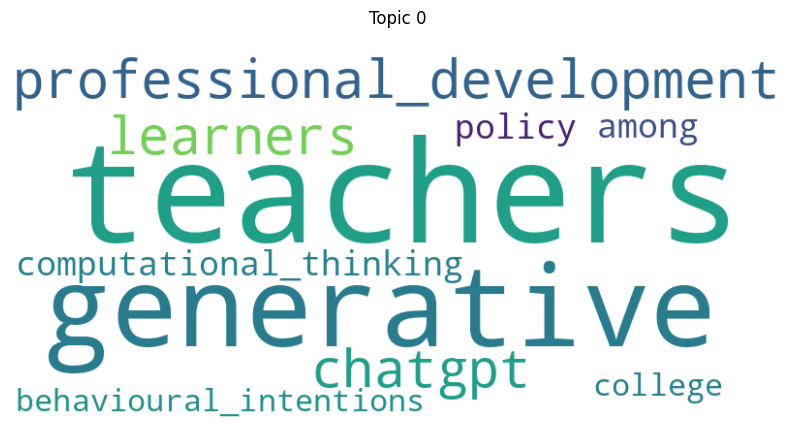

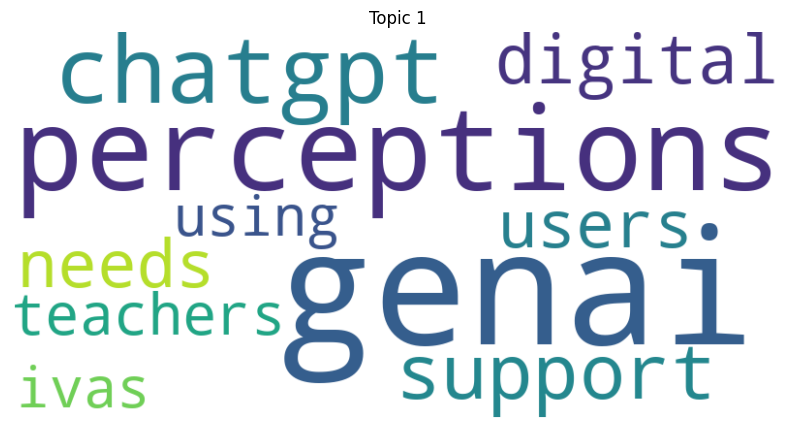

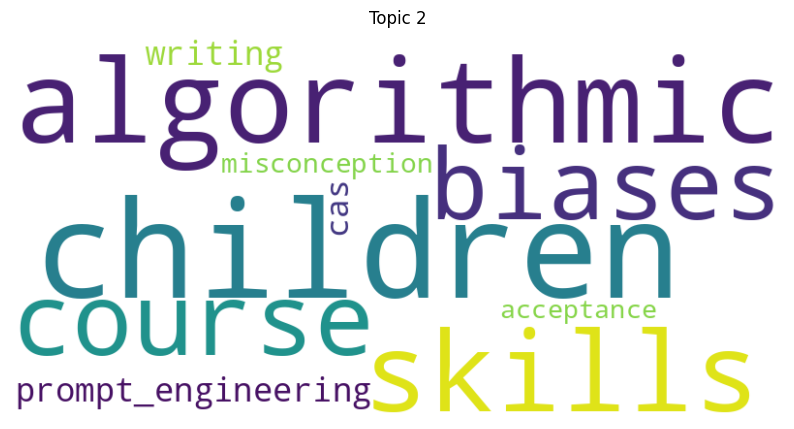

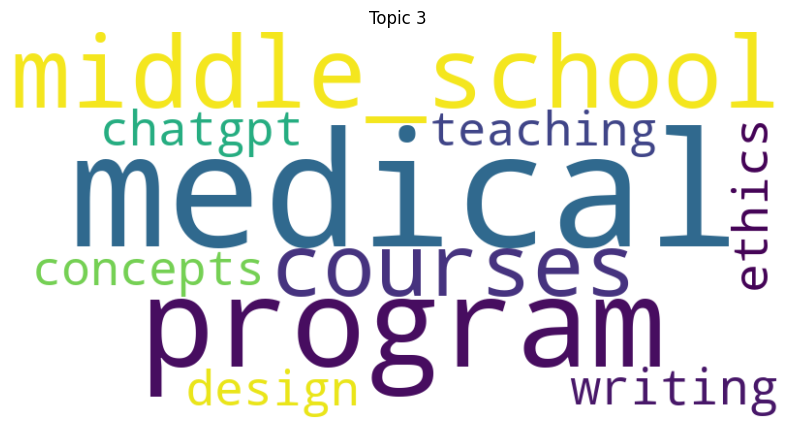

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the most likely words for each topic / Получение наиболее вероятных слов для каждой темы
topics_words = lda_model.show_topics(formatted=False)

# Create a word cloud for each topic / Создание облака слов для каждой темы
for topic_id, topic in topics_words:
    word_freq = {word: freq for word, freq in topic}

    # Create a word cloud /Create Генерация облака слов
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Visualization of word cloud / Визуализация облака слов
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id}')
    plt.show()

#5. Evaluating model performance / Оценка эффективности модели:

Several metrics can be used to evaluate the performance of the LDA model, including perplexity and coherence score. Here is how you can calculate these metrics

Для оценки эффективности модели LDA можно использовать несколько метрик, включая perplexity (перплексия) и coherence score (коэффициент когерентности). Вот как вы можете вычислить эти параметры:

* Perplexity: Perplexity is a metric that evaluates how well a model predicts a test dataset. The lower the perplexity value, the better the model.

  Перплексия: это метрика, которая оценивает, насколько хорошо модель предсказывает тестовый набор данных. Чем ниже значение perplexity, тем лучше модель.

* Coherence Score: The coherence coefficient provides an estimate of how well words in the same topic agree with each other. A higher coherence coefficient indicates more meaningful topics.

 Коэффициент когерентности: предоставляет оценку того, насколько хорошо слова в одной теме согласуются друг с другом. Более высокий коэффициент когерентности указывает на более осмысленные темы.

* средний индекс Jaccard (Average Jaccard Index)
* Topic Diversity: Показывает, насколько разнообразны темы.
* Topic Stability: Показывает, насколько стабильны темы при изменении данных.
* Human Evaluation: Важно проводить оценку тем человеком, чтобы убедиться в их интерпретируемости и соответствии вашим ожиданиям.
* Средняя точность тем (Average Topic Precision): Средняя точность тем измеряет степень четкости (точности) каждой темы в модели LDA.

In [ ]:
from gensim.matutils import jaccard

# Вычисление среднего индекса Jaccard между всеми парами тем
jaccard_scores = []
num_topics = lda_model.num_topics
for i in range(num_topics):
    for j in range(i+1, num_topics):
        jaccard_score = jaccard(lda_model.get_topic_terms(i), lda_model.get_topic_terms(j))
        jaccard_scores.append(jaccard_score)

average_jaccard_index = sum(jaccard_scores) / len(jaccard_scores)
print('Average Jaccard Index:', average_jaccard_index)

Average Jaccard Index: 0.7670349972866162


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
perplexity = lda_model.log_perplexity(corpus)  # Чем ниже, тем лучше
print('Perplexity:', perplexity)

Perplexity: -7.229835094621793


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
from gensim.models import CoherenceModel
# Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.229835093657449

Coherence Score:  0.28519350008412886
